## MultiLinear_Regression

## 50_Startups

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\\assignment\\multi_liner_regression\\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#rename column
df.rename(columns={'R&D Spend':'r_spend','Marketing Spend':'Marketing_Spend'},inplace=True)
df.head()

,r_spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#check the missing value
df.isna().sum()

r_spend            0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [6]:
#PREPARING A MODEL

In [7]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~r_spend+Administration+Marketing_Spend',data=df).fit()

In [8]:
model.params

Intercept          50122.192990
r_spend                0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [9]:
#t&p values
print(model.tvalues,'\n',model.pvalues)

Intercept           7.626218
r_spend            17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
r_spend            2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [10]:
#Acurracy value(r_square)
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

## checking with Simple_linear_Regression Models

In [11]:
import statsmodels.formula.api as smf
m_rspend=smf.ols('Profit~r_spend',data=df).fit()

In [12]:
m_rspend.params

Intercept    49032.899141
r_spend          0.854291
dtype: float64

In [13]:
print(m_rspend.tvalues, '\n', m_rspend.pvalues)

Intercept    19.320288
r_spend      29.151139
dtype: float64 
 Intercept    2.782697e-24
r_spend      3.500322e-32
dtype: float64


##  r^2 value for m_spend

In [14]:
m_spend=m_rspend.rsquared*100
m_spend
print('accuracy of model m_spend',m_spend)

accuracy of model m_spend 94.65353160804393


In [15]:
m_admin=smf.ols('Profit~Administration',data=df).fit()

In [16]:
m_admin.params

Intercept         76974.471305
Administration        0.288749
dtype: float64

In [17]:
print(m_admin.tvalues, '\n', m_admin.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


## # r^2 value for m_admin

In [18]:
# r^2 VALUE
m_admin=m_admin.rsquared*100
print('accuracy of model m_admin',m_admin)
m_admin

accuracy of model m_admin 4.028714077757223


4.028714077757223

In [19]:
m_mar=smf.ols('Profit~Marketing_Spend',data=df).fit()

In [20]:
m_mar.params

Intercept          60003.548816
Marketing_Spend        0.246459
dtype: float64

In [21]:
print(m_mar.tvalues, '\n', m_mar.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


## r^2 value for m_mar

In [22]:
# r^2 VALUE
m_mar=m_mar.rsquared*100
print('accuracy of model m_mar',m_mar)

accuracy of model m_mar 55.915357461155146


## r^2 table

In [23]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [24]:
from tabulate import tabulate
data=[
    ["m_spend",94.65],
     ["m_admin",4.028],
    ["m_mar",55.91]
]
head=["Model","R^2 Value"]
print(tabulate(data,headers=head,tablefmt="grid"))

+---------+-------------+
| Model   |   R^2 Value |
+=========+=============+
| m_spend |      94.65  |
+---------+-------------+
| m_admin |       4.028 |
+---------+-------------+
| m_mar   |      55.91  |
+---------+-------------+


In [25]:
## CORRELATION MATRIX

In [26]:
df.corr()

,r_spend,Administration,Marketing_Spend,Profit
r_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


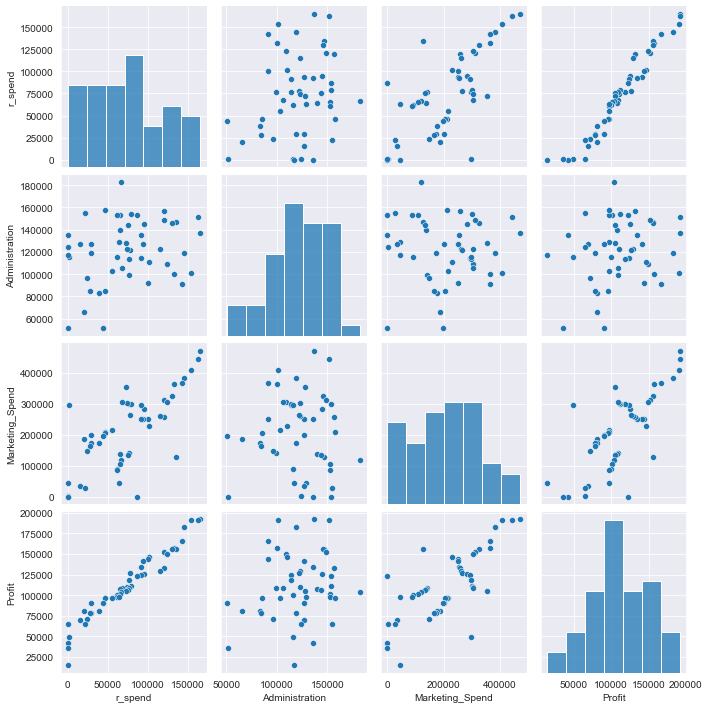

In [27]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [28]:
#calculating VIF

In [29]:
rsq_Profit =smf.ols('Profit~r_spend+Administration+Marketing_Spend',data=df).fit().rsquared
vif_Profit = 1/(1-rsq_Profit)

In [30]:
vif_Profit

20.30291711474573

In [31]:
rsq_r_spend =smf.ols('r_spend~Profit+Administration+Marketing_Spend',data=df).fit().rsquared
vif_r_spend = 1/(1-rsq_r_spend)

In [32]:
vif_r_spend

19.563000566996017

In [33]:
rsq_admin =smf.ols('Administration~Marketing_Spend+r_spend+Profit',data=df).fit().rsquared
vif_admin = 1/(1-rsq_admin)

In [34]:
vif_admin

1.18214557257802

In [35]:
rsq_mar =smf.ols('Marketing_Spend~Administration+r_spend+Profit',data=df).fit().rsquared
vif_mar = 1/(1-rsq_mar)

In [36]:
vif_mar

2.4653316722258243

In [37]:
#Sorting vif values in a data frame
d1={'Variables':['Profit','r_spend','Administration','Marketing_Spend'],'VIF':[vif_Profit,vif_r_spend,vif_admin,vif_mar]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Profit,20.302917
1,r_spend,19.563001
2,Administration,1.182146
3,Marketing_Spend,2.465332


## *Profit and r_spend(R&D spend) are highly corelated

## Residual Analysis

## Test for Normality of Residual (Q-Q Plot)

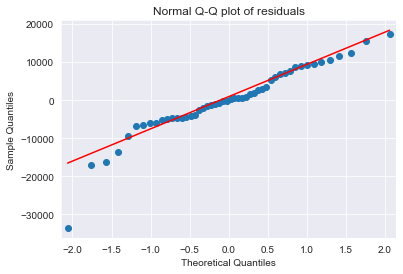

In [38]:
import statsmodels.api as sm
model=smf.ols('Profit~r_spend+Administration+Marketing_Spend',data=df).fit()
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [39]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

## Residual Plot for Homoscedasticity 
## (Residual Value Vs Fitted Value)

In [40]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

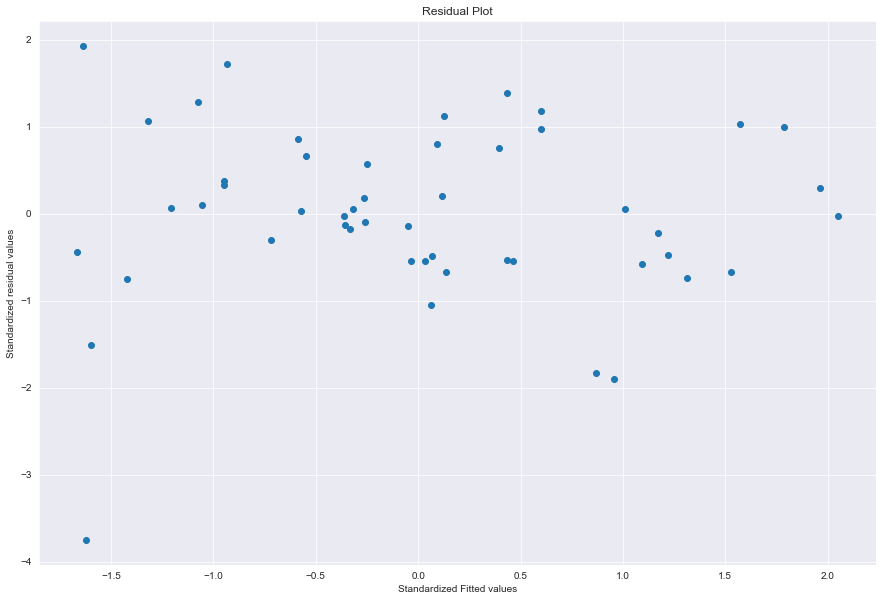

In [56]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors
## (residual Vs Independent Values)

eval_env: 1


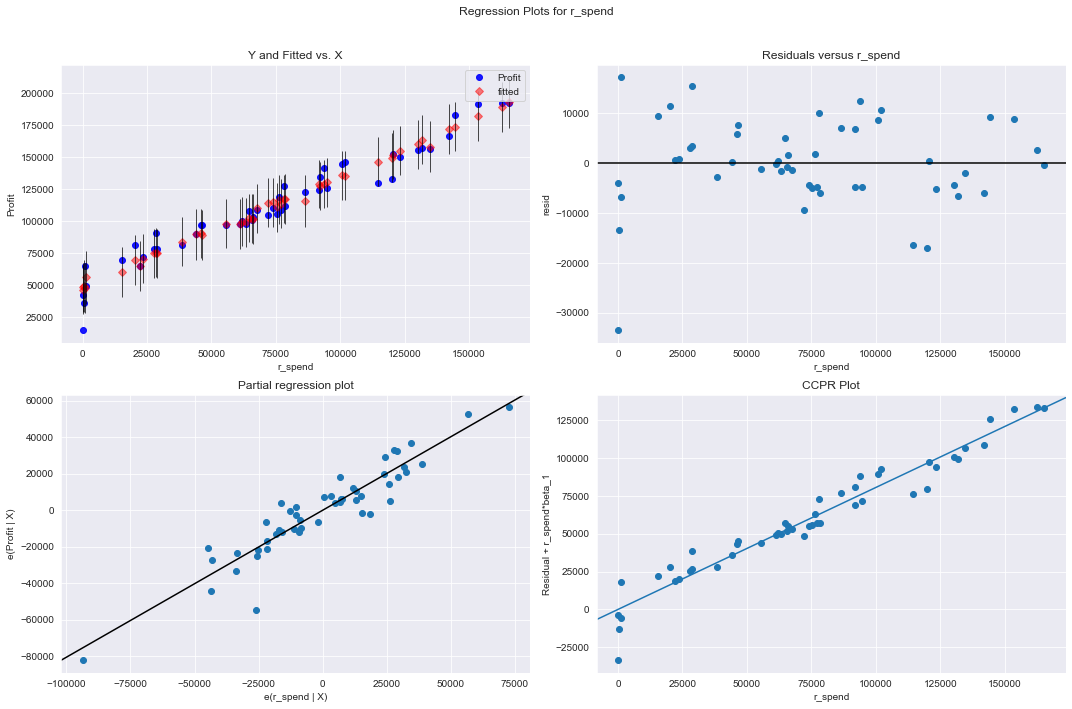

In [57]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "r_spend", fig=fig)
plt.show()

eval_env: 1


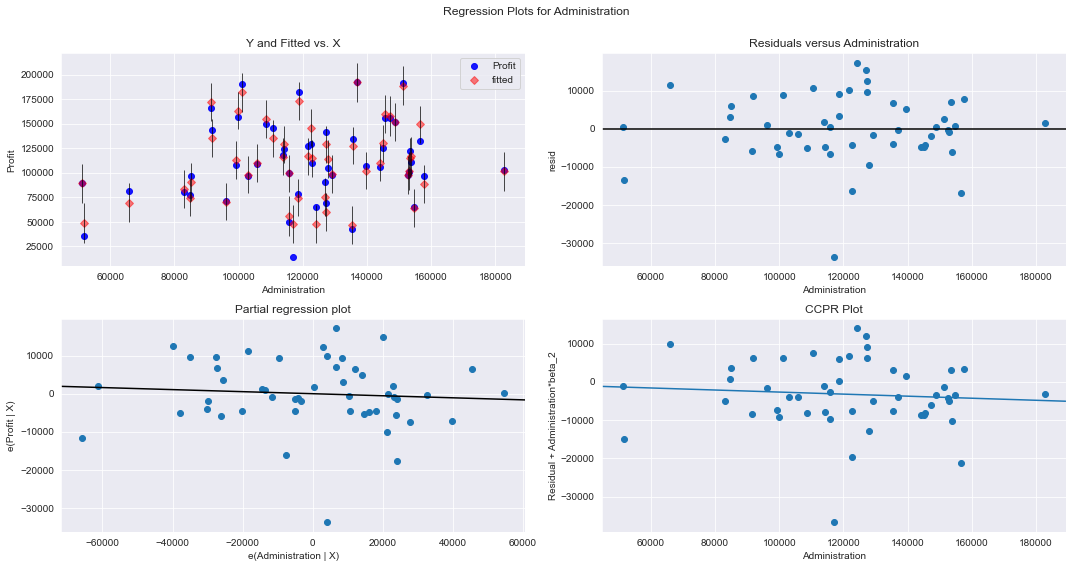

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


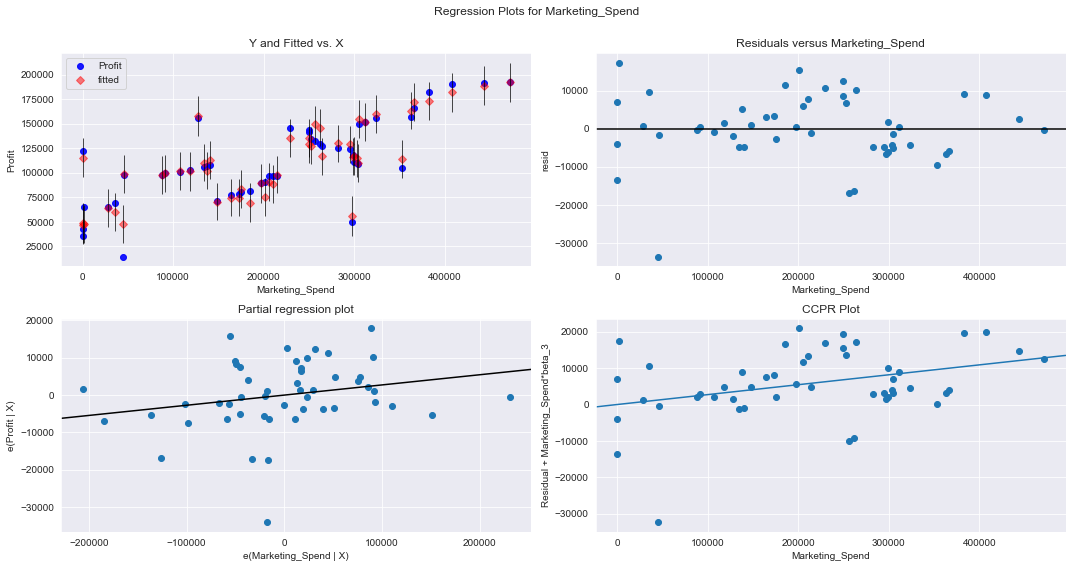

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

## Detecting Influencers/Outliers

## Cook's Distance

In [45]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

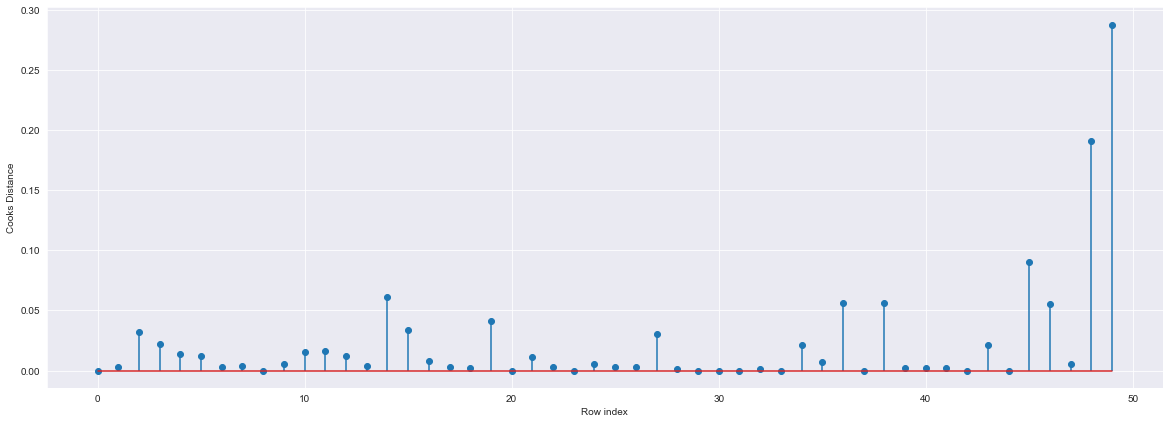

In [46]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

## Position of outliers at 0.288 at 49 index

## High Influence Points

In [49]:
df.shape

(50, 5)

In [50]:
# k= no of features
#n=no.s of observations

#leverage value of more than 3*((k + 1)/n) are treated as highly Influential Points



In [51]:
k=4
n=50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

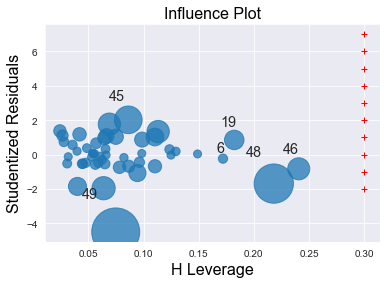

In [52]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [53]:
# at 0.30 there is no data point that are influencing 

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        00:43:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
r_spend             0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

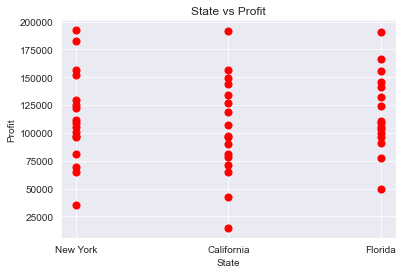

In [55]:
#Plot State vs Profit
x1 = df.iloc[:, 3].values
y1 = df.iloc[:, 4].values
plt.scatter(x1,y1,color='Red',s=50)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('State vs Profit')
plt.show()